# 🗺️ Holiday_Package_Prediction

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - `Basic, Standard, Deluxe, Super Deluxe, King`. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("/content/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

## Data Cleaning

### Hnadling Missing Values

1. Handling Missing Values.
2. Handling duplicates.
3. Check data type.
4. Understand the dataset.

In [4]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [5]:
# cehck for which numeric column have null values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            print(label)


TypeofContact
Occupation
Gender
ProductPitched
MaritalStatus
Designation


In [6]:
# check all the categories
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [7]:
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [8]:
df.TypeofContact.value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [9]:
df.Occupation.value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [10]:
df.ProductPitched.value_counts()

,count
ProductPitched,
Basic,1842
Deluxe,1732
Standard,742
Super Deluxe,342
King,230


In [11]:
df.Designation.value_counts()

,count
Designation,
Executive,1842
Manager,1732
Senior Manager,742
AVP,342
VP,230


In [12]:
df.tail(100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4788,204788,0,31.0,Self Enquiry,1,14.0,Salaried,Male,3,4.0,Deluxe,3.0,Married,3.0,0,5,1,2.0,Manager,22169.0
4789,204789,0,45.0,Self Enquiry,1,36.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,5,1,2.0,Manager,23219.0
4790,204790,0,21.0,Self Enquiry,3,28.0,Small Business,Male,3,2.0,Basic,3.0,Unmarried,3.0,0,3,1,2.0,Executive,21356.0
4791,204791,0,47.0,Self Enquiry,1,9.0,Large Business,Male,3,4.0,Deluxe,3.0,Married,4.0,0,1,0,1.0,Manager,26057.0
4792,204792,0,43.0,Company Invited,2,9.0,Small Business,Male,4,2.0,Deluxe,5.0,Married,2.0,0,1,1,2.0,Manager,24950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [13]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Unmarried','Single')

In [14]:
df.Gender.value_counts()

,count
Gender,
Male,2916
Female,1972


In [15]:
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,2340
Single,1598
Divorced,950


In [16]:
# storing all the labels with null values inside array
feature_wit_na= [ features for features in df.columns if df[features].isnull().sum()>=1]
for feature in feature_wit_na:
    print(feature,':' , np.round(df[feature].isnull().mean()*100,4),'% missing values')

Age : 4.6236 % missing values
TypeofContact : 0.5115 % missing values
DurationOfPitch : 5.135 % missing values
NumberOfFollowups : 0.9206 % missing values
PreferredPropertyStar : 0.5319 % missing values
NumberOfTrips : 2.8642 % missing values
NumberOfChildrenVisiting : 1.3502 % missing values
MonthlyIncome : 4.7668 % missing values


In [17]:
# Statistics on numerical column (Null cols)
df[feature_wit_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. Impute Median Value for Age column
2. Impute Mode for Type of contact
3. Impute Median for Duration of Pitch
4. Impute Mode for Number of Followuo as it is discrete feature
5. Impute Mode for PreferredPropertyStart
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [18]:
# check for which numeric column have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
            print(label)

CustomerID
ProdTaken
Age
CityTier
DurationOfPitch
NumberOfPersonVisiting
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
MonthlyIncome


In [19]:
# check for which Non numeric column have null values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            print(label)

TypeofContact
Occupation
Gender
ProductPitched
MaritalStatus
Designation


In [20]:
#  Age
df.Age.fillna(df.Age.median(),inplace=True)

# TypeofContrat
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

# PreferredPropertyStart
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(0,inplace=True)

In [21]:
# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [22]:
# check for any missing value
df.isna().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [23]:
# drop column of ID he's not useful for me
df.drop('CustomerID',axis=1,inplace=True)

In [24]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Single,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## Feature Engineering

### Feature Extraction

In [25]:
# create a new column for feature
df['TotalVisiting']=df.NumberOfPersonVisiting + df['NumberOfChildrenVisiting']
# drop old columns
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [26]:
df.shape

(4888, 18)

In [27]:
# get all numerical feature and store into an array
# method 1 :
num_feature_2 = [feature for feature in df.columns if df[feature].dtype != 'O']

# Method 2
num_feature = [label for label , content in df.items() if pd.api.types.is_numeric_dtype(content)]

# check if they gie same result
print(num_feature_2==num_feature)

# check of length of numerical features
print('Num of numerical features' , len(num_feature))


True
Num of numerical features 12


In [28]:
num_feature

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisiting']

In [29]:
# get categorical features
# Methode 1
cat_feature = [label for label , content in df.items() if not pd.api.types.is_numeric_dtype(content)]

# Method 2
cat_feature_2 = [feature for feature in df.columns if df[feature].dtype == 'O']

# check if they gie same result
print(cat_feature==cat_feature_2)

# print length of categorical features
print('Num of categorical features' , len(cat_feature))

True
Num of categorical features 6


In [ ]:
cat_feature

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [30]:
# Discrete Features
discrete_feature = [feature for feature in num_feature if len(df[feature].unique())<25]
print('Num of discrete features' , len(discrete_feature))

Num of discrete features 9


In [31]:
# Coontinuous Features
continuous_feature = [feature for feature in num_feature if feature not in discrete_feature]
print('Num of continuous features' , len(continuous_feature))

Num of continuous features 3


## Train test Split

In [32]:
df.ProdTaken.value_counts()

,count
ProdTaken,
0,3968
1,920


In [33]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['ProdTaken'],axis=1)
y=df['ProdTaken']

In [34]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [36]:
# separate dataset into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [37]:
# create Columntransformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',categorical_transformer,cat_features),
        ('StandardScaler',numerical_transformer,num_features)
    ]
)



In [ ]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [38]:
# applying transformation into training and testing Dataset
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [39]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [40]:
# visualize as DataFrame
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.157926,-0.721400,-1.020350,1.284279,-0.725271,-0.078776,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.508072,-0.721400,0.690023,0.282777,-0.725271,1.495396,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.396069,-0.721400,-1.020350,0.282777,1.771041,0.445948,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.064073,-0.721400,-1.020350,1.284279,-0.725271,-0.078776,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.730071,-0.721400,2.400396,-1.720227,-0.725271,1.495396,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.045924,-0.721400,-0.653841,1.284279,-0.725271,-0.603500,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397072,1.455047,-0.898180,-0.718725,1.771041,-1.128223,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.064073,1.455047,1.545210,0.282777,-0.725271,2.020120,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.045924,1.455047,1.789549,1.284279,-0.725271,-0.078776,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [41]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.601925,1.455047,-0.287333,1.284279,-0.725271,-1.128223,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.952071,0.366823,-0.531672,0.282777,0.522885,-1.128223,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.046926,1.455047,0.812193,0.282777,-0.725271,0.970672,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.619072,-0.721400,2.522566,2.285781,-0.725271,1.495396,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.378923,1.455047,-1.020350,0.282777,0.522885,-0.078776,1.581280,0.679690,0.782966,-0.317047,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.064073,-0.721400,-1.020350,0.282777,-0.725271,1.495396,-0.632399,1.408395,0.782966,0.498219,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.934924,-0.721400,-1.142519,0.282777,1.771041,-0.603500,1.581280,-1.506426,-1.277194,-1.184015,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.268926,-0.721400,1.056532,1.284279,-0.725271,-0.603500,1.581280,1.408395,0.782966,0.690012,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.267923,-0.721400,-0.287333,-2.721728,-0.725271,-0.603500,-0.632399,1.408395,0.782966,-0.228278,-0.774151


## Random Forest Classifier Problem

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report ,precision_score , recall_score , f1_score, roc_auc_score , roc_curve

In [43]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred) # Calculate roc_auc_score

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred) # Calculate roc_auc_score

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- roc_auc_score: {:.4f}".format(model_train_roc_auc))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 score: {:.4f}".format(model_test_f1))

    print("- roc_auc_score: {:.4f}".format(model_test_roc_auc))
    print('='*35)
    print('\n')



Logistic Regression
Model performance for Training set
- Accuracy: 0.8458
- Precision: 0.6994
- Recall: 0.3032
- F1 score: 0.8200
- roc_auc_score: 0.6366
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- Precision: 0.6829
- Recall: 0.2932
- F1 score: 0.8078
- roc_auc_score: 0.6301


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- roc_auc_score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9202
- Precision: 0.8054
- Recall: 0.7801
- F1 score: 0.9198
- roc_auc_score: 0.8672


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- roc_auc_score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9243
- Precision: 0.9535
- Recall: 0.6440
- F1 score: 0.9184
- roc_auc_score: 0.8182


Gradient Boosting
Model performance for Training 

## HyperParameter Tuning

In [44]:
rf_params = {
    'max_depth': [5,8,15,None, 10, 20],
    'max_features': [10,7, 'auto', 8, 11],
    'n_estimators': [100, 250, 350, 500, 1000],
    'min_samples_split': [2, 5, 8, 10, 15 , 20]
}

adabost_param = {
    'n_estimators': [50 , 60 ,70, 90, 100 ,120],
    "algorithm": ['SAMME', 'SAMME.R'],

}

In [45]:
rf_params

{'max_depth': [5, 8, 15, None, 10, 20],
 'max_features': [10, 7, 'auto', 8, 11],
 'n_estimators': [100, 250, 350, 500, 1000],
 'min_samples_split': [2, 5, 8, 10, 15, 20]}

In [46]:
adabost_param

{'n_estimators': [50, 60, 70, 90, 100, 120], 'algorithm': ['SAMME', 'SAMME.R']}

In [47]:
# model list forr Hyperparameter tuning
randomcv_models = [
    ("Random Forest", RandomForestClassifier(), rf_params) ,
    ("AdaBoost", AdaBoostClassifier(), adabost_param)
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

    for model_name in model_param:
        print(f"-------------------Best parameters for {model_name}----------------")
        print(model_param[model_name])
        print("="*50)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------------Best parameters for Random Forest----------------
{'n_estimators': 350, 'min_samples_split': 2, 'max_features': 10, 'max_depth': None}
Fitting 3 folds for each of 12 candidates, totalling 36 fits
-------------------Best parameters for Random Forest----------------
{'n_estimators': 350, 'min_samples_split': 2, 'max_features': 10, 'max_depth': None}
-------------------Best parameters for AdaBoost----------------
{'n_estimators': 90, 'algorithm': 'SAMME'}


In [49]:
model = {
    "Random Forest" : RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=11,max_depth=None),
    "AdaBoost" : AdaBoostClassifier(n_estimators=90,algorithm='SAMME')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred) # Calculate roc_auc_score

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred) # Calculate roc_auc_score

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- roc_auc_score: {:.4f}".format(model_train_roc_auc))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 score: {:.4f}".format(model_test_f1))

    print("- roc_auc_score: {:.4f}".format(model_test_roc_auc))
    print('='*35)
    print('\n')



Logistic Regression
Model performance for Training set
- Accuracy: 0.8458
- Precision: 0.6994
- Recall: 0.3032
- F1 score: 0.8200
- roc_auc_score: 0.6366
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- Precision: 0.6829
- Recall: 0.2932
- F1 score: 0.8078
- roc_auc_score: 0.6301


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- roc_auc_score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9223
- Precision: 0.7979
- Recall: 0.8063
- F1 score: 0.9224
- roc_auc_score: 0.8784


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 score: 1.0000
- roc_auc_score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9264
- Precision: 0.9542
- Recall: 0.6545
- F1 score: 0.9209
- roc_auc_score: 0.8234


Gradient Boosting
Model performance for Training 

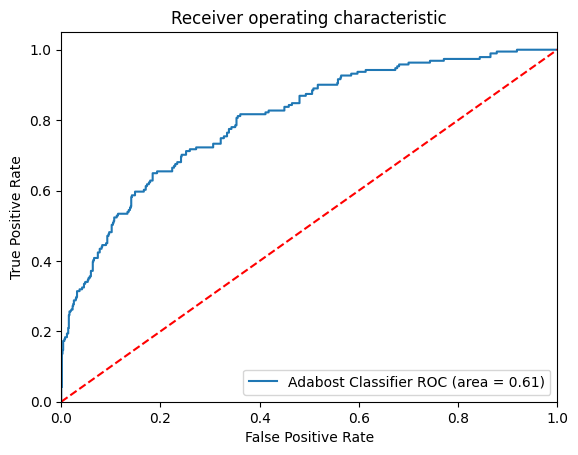

In [55]:
# plot ROC AUC curve
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure()

auc_models =[
    {
        "label":'Adabost Classifier',
        "model":AdaBoostClassifier(n_estimators=90,algorithm='SAMME'),
        'auc': 0.608
    },
]

# create a loop through all model

for m in auc_models:
  model = m['model']
  model.fit(X_train,y_train)
  fpr , tpr , thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
  # calculate area under the curve to display on the plot
  plt.plot(fpr , tpr , label='%s ROC (area = %0.2f)' % (m['label'],m['auc']))

  # custom setting for the plot
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()